## Prophet

Prophet FB was developed by Facebook as an algorithm for the in-house prediction of time series values for different business applications. Therefore, it is specifically designed for the prediction of business time series.

It is an additive model consisting of four components:

Prophet
Let us discuss the meaning of each component:

g(t): It represents the trend and the objective is to capture the general trend of the series. For example, the number of advertisements views on Facebook is likely to increase over time as more people join the network. But what would be the exact function of increase?
s(t): It is the Seasonality component. The number of advertisement views might also depend on the season. For example, in the Northern hemisphere during the summer months, people are likely to spend more time outdoors and less time in from of their computers. Such seasonal fluctuations can be very different for different business time series. The second component is thus a function that models seasonal trends. 
h(t): The Holidays component. We use the information for holidays which have a clear impact on most business time series. Note that holidays vary between years, countries, etc. and therefore the information needs to be explicitly provided to the model.
The error term εt stands for random fluctuations that cannot be explained by the model. As usual, it is assumed that εt follows a normal distribution N (0, σ2) with zero mean and unknown variance σ that has to be derived from the data.

In [31]:
# This is for the Lima department
# Python
import pandas as pd
from prophet import Prophet
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DSA5900/LIMA_DEPARTMENT.csv')
df.head()

,fecha_resultado,departamento,num_death_cases,num_positive_cases
0,2020-03-06,LIMA,0,1
1,2020-03-07,LIMA,0,4
2,2020-03-08,LIMA,0,2
3,2020-03-09,LIMA,0,1
4,2020-03-10,LIMA,0,1


In [4]:
df.describe()

,num_death_cases,num_positive_cases
count,1124.000000,1124.000000
mean,85.237544,1650.041815
std,111.491274,2815.540562
min,0.000000,0.000000
25%,11.000000,333.000000
50%,22.000000,752.500000
75%,122.250000,2099.000000
max,406.000000,25087.000000


In [5]:
print(df['num_death_cases'].unique())
print(df['fecha_resultado'].unique())

[  0   1   4   7   3   5   9   6  11  10  14   8  12  30  33  19  31  62
  48  52  60  84  72  88  83  82 105 110 126 133 113 131 124 143 149 152
 181 203 180 190 194 201 193 192 244 243 230 211 264 229 242 262 300 236
 294 257 246 272 297 317 314 280 327 320 282 349 281 250 315 307 316 318
 284 322 275 292 295 248 249 258 235 256 232 207 226 259 228 263 251 268
 245 254 269 247 267 223 279 261 260 270 218 224 220 225 227 184 210 209
 195 162 179 171 163 169 158 168 141 136 122 116 117 130 115 132 119  95
 109 103 114  80  78  85  76  96  86  58  66  68  51  73  53  57  81  42
  71  47  41  45  46  38  44  40  61  36  37  34  26  23  35  32  49  28
  43  39  54  50  77  89  69  87 100 108 102 125 140 154 176 178 177 191
 206 239 222 255 293 296 309 326 287 328 342 299 332 373 366 346 334 388
 383 357 360 376 352 347 380 367 341 381 377 362 343 350 325 406 353 335
 344 345 370 365 351 356 369 358 355 372 337 340 374 359 354 321 324 298
 323 306 304 266 253 234 216 214 205 204 197 196 15

In [6]:
df.dtypes

fecha_resultado       object
departamento          object
num_death_cases        int64
num_positive_cases     int64
dtype: object

In [7]:
df['fecha_resultado'] = pd.to_datetime(df['fecha_resultado'], format='%Y/%m/%d')

In [8]:
df['Year'] = df['fecha_resultado'].dt.year
df['Month'] = df['fecha_resultado'].dt.month
df['Day'] = df['fecha_resultado'].dt.day
df['ds'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [9]:
df.head()

,fecha_resultado,departamento,num_death_cases,num_positive_cases,Year,Month,Day,ds
0,2020-03-06,LIMA,0,1,2020,3,6,2020-03-06
1,2020-03-07,LIMA,0,4,2020,3,7,2020-03-07
2,2020-03-08,LIMA,0,2,2020,3,8,2020-03-08
3,2020-03-09,LIMA,0,1,2020,3,9,2020-03-09
4,2020-03-10,LIMA,0,1,2020,3,10,2020-03-10


In [10]:
df.tail()

,fecha_resultado,departamento,num_death_cases,num_positive_cases,Year,Month,Day,ds
1119,2023-03-30,LIMA,7,231,2023,3,30,2023-03-30
1120,2023-03-31,LIMA,5,184,2023,3,31,2023-03-31
1121,2023-04-01,LIMA,4,151,2023,4,1,2023-04-01
1122,2023-04-02,LIMA,6,77,2023,4,2,2023-04-02
1123,2023-04-03,LIMA,0,152,2023,4,3,2023-04-03


In [11]:
df.dtypes

fecha_resultado       datetime64[ns]
departamento                  object
num_death_cases                int64
num_positive_cases             int64
Year                           int64
Month                          int64
Day                            int64
ds                    datetime64[ns]
dtype: object

In [12]:
df.drop(['fecha_resultado', 'departamento','num_positive_cases', 'Year', 'Month', 'Day', ], axis=1, inplace= True)
df.columns = ['y', 'ds'] # Deaths(y)

In [13]:
df.head()

,y,ds
0,0,2020-03-06
1,0,2020-03-07
2,0,2020-03-08
3,0,2020-03-09
4,0,2020-03-10


In [21]:
df['y'] = df['y'].cumsum()
df

,y,ds
0,0,2020-03-06
1,0,2020-03-07
2,0,2020-03-08
3,0,2020-03-09
4,0,2020-03-10
...,...,...
1119,95792,2023-03-30
1120,95797,2023-03-31
1121,95801,2023-04-01
1122,95807,2023-04-02


In [22]:
# First 1000 days
df_first_1000 = df.iloc[:1000, :]
df_first_1000
#Train data

,y,ds
0,0,2020-03-06
1,0,2020-03-07
2,0,2020-03-08
3,0,2020-03-09
4,0,2020-03-10
...,...,...
995,94679,2022-11-26
996,94695,2022-11-27
997,94703,2022-11-28
998,94714,2022-11-29


In [35]:
# 
m = Prophet(interval_width= 0.95, daily_seasonality = False) # interval_width looks at our confidence interval
model = m.fit(df_first_1000) # fit the data using fit, similar to other prediction models 

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3xxnf3r/32mhvl4a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe3xxnf3r/7vi_c7kt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42583', 'data', 'file=/tmp/tmpe3xxnf3r/32mhvl4a.json', 'init=/tmp/tmpe3xxnf3r/7vi_c7kt.json', 'output', 'file=/tmp/tmpe3xxnf3r/prophet_modelhei59i16/prophet_model-20230427111529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:15:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:15:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [36]:
#Predictions or Forecast
future = m.make_future_dataframe(periods=124, freq='D') # periods up to 14 days. Frequency in day. 
forecast = m.predict(future) # predict is used to forecast forward
forecast.head() # display the first 5 rows in historical data
#yhat lower and upper and your lower estimates 
# yhat at the end is your predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-06,63.840842,-193.643839,107.423285,63.840842,63.840842,-104.747652,-104.747652,-104.747652,0.601795,0.601795,0.601795,-105.349447,-105.349447,-105.349447,0.0,0.0,0.0,-40.906810
1,2020-03-07,49.974031,-182.192300,118.254838,49.974031,49.974031,-81.810519,-81.810519,-81.810519,1.151195,1.151195,1.151195,-82.961714,-82.961714,-82.961714,0.0,0.0,0.0,-31.836488
2,2020-03-08,36.107219,-172.780075,124.577126,36.107219,36.107219,-64.034704,-64.034704,-64.034704,-1.609254,-1.609254,-1.609254,-62.425450,-62.425450,-62.425450,0.0,0.0,0.0,-27.927484
3,2020-03-09,22.240408,-180.203337,139.093692,22.240408,22.240408,-43.799789,-43.799789,-43.799789,-0.463652,-0.463652,-0.463652,-43.336137,-43.336137,-43.336137,0.0,0.0,0.0,-21.559381
4,2020-03-10,8.373597,-167.927613,129.552989,8.373597,8.373597,-24.510301,-24.510301,-24.510301,0.783991,0.783991,0.783991,-25.294292,-25.294292,-25.294292,0.0,0.0,0.0,-16.136704


In [37]:
forecast.tail() # We are able to see our forecast 
# A really detailed time series forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1119,2023-03-30,97689.362789,76085.484836,117513.771890,75860.606115,117197.503946,347.867589,347.867589,347.867589,-1.188906,-1.188906,-1.188906,349.056495,349.056495,349.056495,0.0,0.0,0.0,98037.230378
1120,2023-03-31,97709.683322,75641.489473,117934.604832,75313.213413,117537.980921,363.944734,363.944734,363.944734,0.601795,0.601795,0.601795,363.342939,363.342939,363.342939,0.0,0.0,0.0,98073.628056
1121,2023-04-01,97730.003856,75078.676083,118186.014898,74765.820712,117814.728553,376.792294,376.792294,376.792294,1.151195,1.151195,1.151195,375.641099,375.641099,375.641099,0.0,0.0,0.0,98106.796150
1122,2023-04-02,97750.324389,74767.211418,118495.500952,74218.917167,118037.214369,384.257266,384.257266,384.257266,-1.609254,-1.609254,-1.609254,385.866520,385.866520,385.866520,0.0,0.0,0.0,98134.581656
1123,2023-04-03,97770.644923,74165.856776,118682.133790,73717.021478,118229.437177,393.535096,393.535096,393.535096,-0.463652,-0.463652,-0.463652,393.998748,393.998748,393.998748,0.0,0.0,0.0,98164.180019


In [38]:
actual_data= df[1000:]
print(actual_data)

          y         ds
1000  94751 2022-12-01
1001  94761 2022-12-02
1002  94783 2022-12-03
1003  94792 2022-12-04
1004  94813 2022-12-05
...     ...        ...
1119  95792 2023-03-30
1120  95797 2023-03-31
1121  95801 2023-04-01
1122  95807 2023-04-02
1123  95807 2023-04-03

[124 rows x 2 columns]


In [39]:
forecast[['ds', 'yhat']] # Filtering method (date and our predicted forecast)

,ds,yhat
0,2020-03-06,-40.906810
1,2020-03-07,-31.836488
2,2020-03-08,-27.927484
3,2020-03-09,-21.559381
4,2020-03-10,-16.136704
...,...,...
1119,2023-03-30,98037.230378
1120,2023-03-31,98073.628056
1121,2023-04-01,98106.796150
1122,2023-04-02,98134.581656


In [40]:
predict_data= forecast[['ds', 'yhat']][1000:]
print(predict_data)

             ds          yhat
1000 2022-12-01  94655.583789
1001 2022-12-02  94666.574360
1002 2022-12-03  94676.136163
1003 2022-12-04  94681.869679
1004 2022-12-05  94690.647714
...         ...           ...
1119 2023-03-30  98037.230378
1120 2023-03-31  98073.628056
1121 2023-04-01  98106.796150
1122 2023-04-02  98134.581656
1123 2023-04-03  98164.180019

[124 rows x 2 columns]


In [41]:
actual_data = df[1000:].reset_index(drop=True)

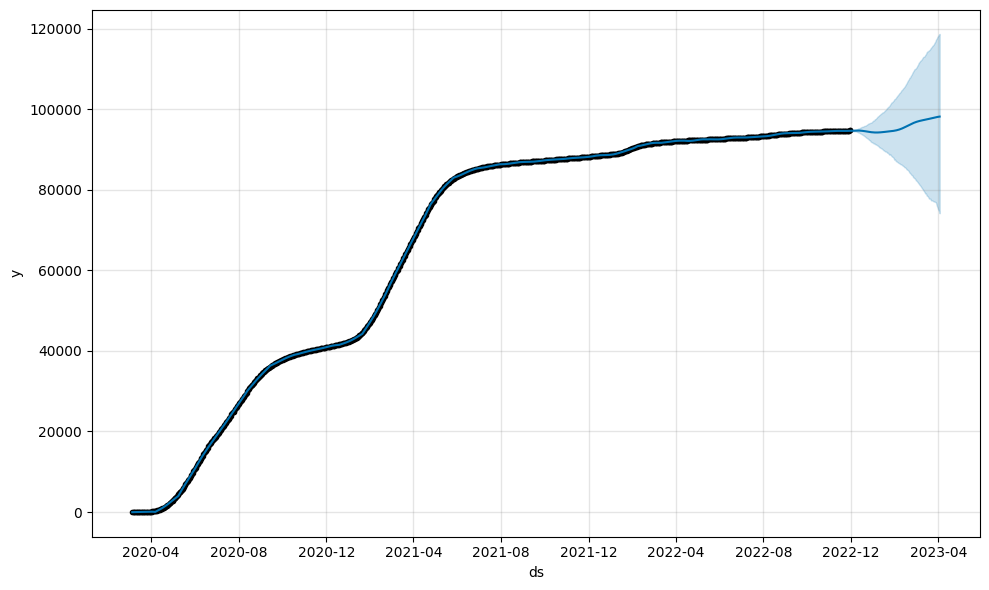

In [42]:
# Plot
fig1 = m.plot(forecast) # The model is stored in the letter m and we plot and then we pass the forecast df
# Blue line represents your prediction or yhat value 
# Shaded blue regions represent your bounding boxes (yhat upper and lower)
# built-in


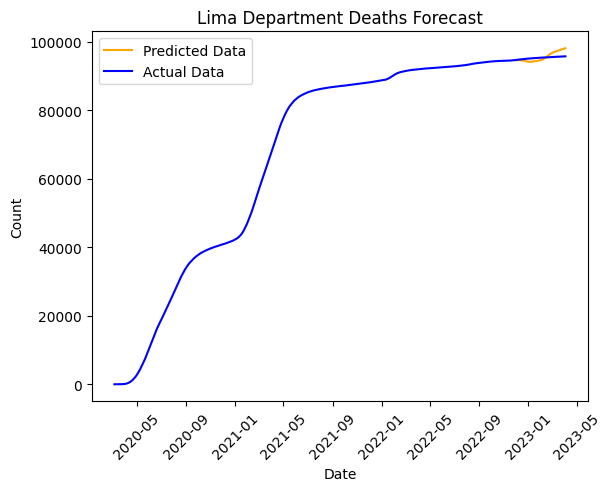

In [48]:
# Plot
plt.figure()
#forecast['actual_data'] = actual_data['y'].values
#fig1 = m.plot(forecast, xlabel='Date', ylabel='Value', c='blue')# The model is stored in the letter m and we plot and then we pass the forecast df
# Blue line represents your prediction or yhat value 
# Shaded blue regions represent your bounding boxes (yhat upper and lower)
# built-in
#fig1.gca().plot(actual_data['ds'], actual_data['y'], 'k.')
# Add the actual data of last 116 days to the curve 
# actual_data= df[1000:]
# print(actual_data)
plt.plot(predict_data[['ds']], predict_data[['yhat']], c='orange', label='Predicted Data')
plt.plot(df[['ds']], df[['y']], c='blue', label='Actual Data')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.title("Lima Department Deaths Forecast")
plt.legend()
plt.show()

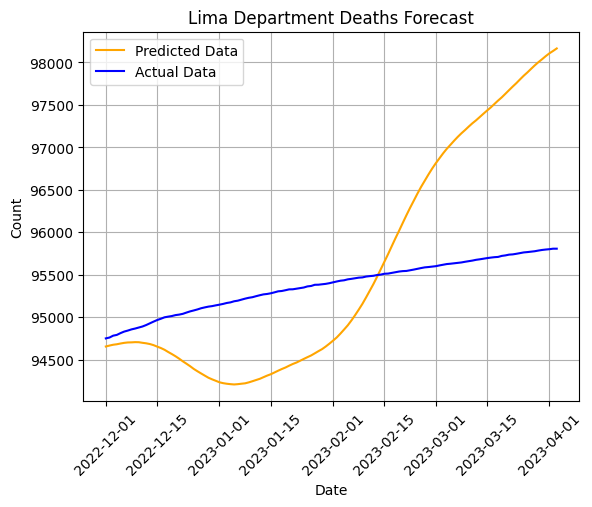

In [44]:
plt.figure()
plt.plot(predict_data[['ds']], predict_data[['yhat']], c='orange', label='Predicted Data')
plt.plot(actual_data[['ds']], actual_data[['y']], c='blue', label='Actual Data')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.title("Lima Department Deaths Forecast")
plt.legend()
plt.grid()
plt.show()

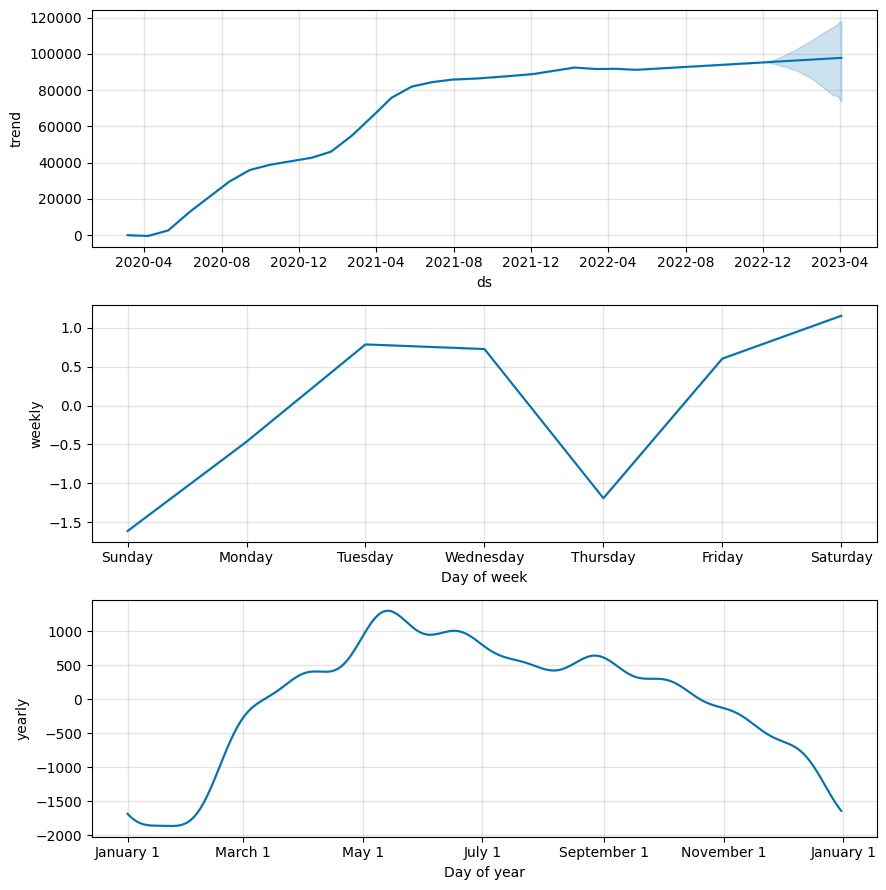

In [45]:
# If you want to see the forecast components, you can use the Prophet.plot_components method. 
# By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. 
# If you include holidays, you’ll see those here, too.
fig2 = m.plot_components(forecast) # This is the decomposition of the trend
# This gives a lot of information on the trends (daily, weekly or seasonally)
# The overall trend is downwards with an upwards end ( From the beginning of 2021 until the end of 2022 it was a downwards trend)
# Weekly, nearly nothing happend if you see the numbers in y axis
# Yearly, during the first quarter you can see more activity then it lowers


In [47]:
# Prophet Lima Department Error Calculation (Deaths)
# Evaluating the model performance
mae = mean_absolute_error(actual_data[['y']], predict_data[['yhat']])
mse = mean_squared_error(actual_data[['y']], predict_data[['yhat']])
rmse = np.sqrt(mse)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

mean_actual = actual_data[['y']].mean()[0]
print(mean_actual)
print(f"RMSE percentage: {(rmse/actual_data[['y']].mean()[0]*100)}%")

MAE: 945.1882449054864
MSE: 1288485.3421045297
RMSE: 1135.1146823579236
95370.95161290323
RMSE percentage: 1.1902100830084912%


In [ ]:
# # Alternative after fitting
# # Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. 
# # You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. 
# # By default it will also include the dates from the history, so we will see the model fit as well.
# future = m.make_future_dataframe(periods=365)
# future.tail()

In [ ]:
# # An interactive figure of the forecast and components can be created with plotly. 
# # You will need to install plotly 4.0 or above separately, as it will not by default be installed with prophet. 
# # You will also need to install the notebook and ipywidgets packages.
# from prophet.plot import plot_plotly, plot_components_plotly

# plot_plotly(m, forecast)
# plot_components_plotly(m, forecast)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Splitting the data into training and testing sets
train = df[:-20]
test = df[-20:] # Last 20 days used as test


In [ ]:
# Fitting the Prophet model to the training data
model = Prophet(interval_width=0.95, daily_seasonality=True)
model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3904abov/q4iaeiuy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3904abov/p_i0w85e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54232', 'data', 'file=/tmp/tmp3904abov/q4iaeiuy.json', 'init=/tmp/tmp3904abov/p_i0w85e.json', 'output', 'file=/tmp/tmp3904abov/prophet_modelk8_8df7q/prophet_model-20230418043118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Making predictions on the test data
future = model.make_future_dataframe(periods=20, freq='D')
forecast = model.predict(future)[-20:]

In [46]:
# Evaluating the model performance
mae = mean_absolute_error(test['y'], forecast['yhat'])
mse = mean_squared_error(test['y'], forecast['yhat'])
rmse = np.sqrt(mse)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


NameError: ignored

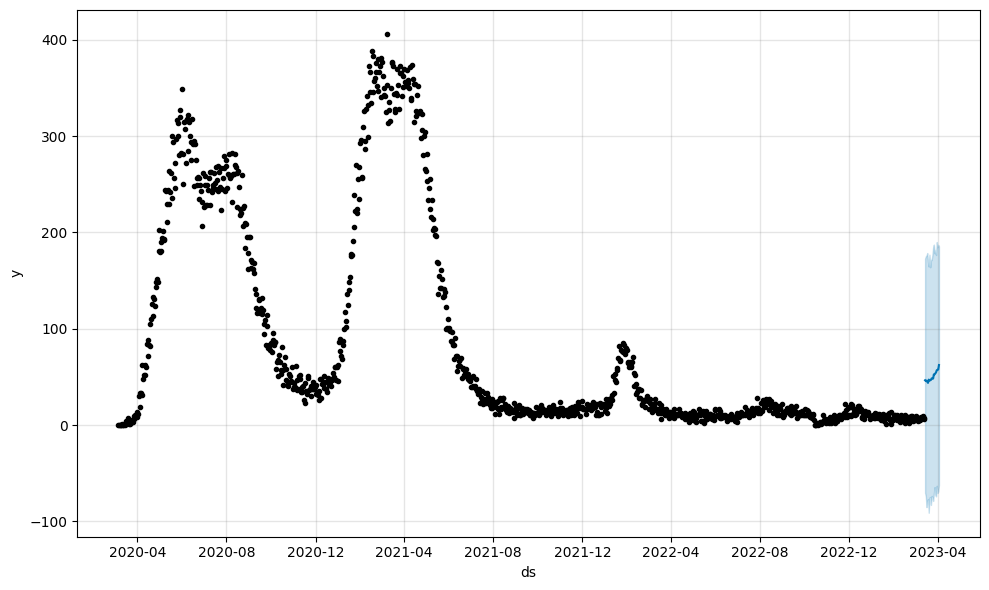

In [ ]:
# Visualizing the results
fig = model.plot(forecast)

In [ ]:
print(len(df['ds'])*0.20) # 223 days

224.8


In [ ]:
# Splitting the data into training and testing sets
train = df[:-223]
test = df[-223:] # Last 20 days used as test


In [ ]:
# Fitting the Prophet model to the training data
model = Prophet(interval_width=0.95, daily_seasonality=True)
model.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3904abov/van_sp7p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3904abov/w2l5duvp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28745', 'data', 'file=/tmp/tmp3904abov/van_sp7p.json', 'init=/tmp/tmp3904abov/w2l5duvp.json', 'output', 'file=/tmp/tmp3904abov/prophet_model8_kgqfg_/prophet_model-20230418043119.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:31:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:31:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Making predictions on the test data
future = model.make_future_dataframe(periods=223, freq='D')
forecast = model.predict(future)[-223:]

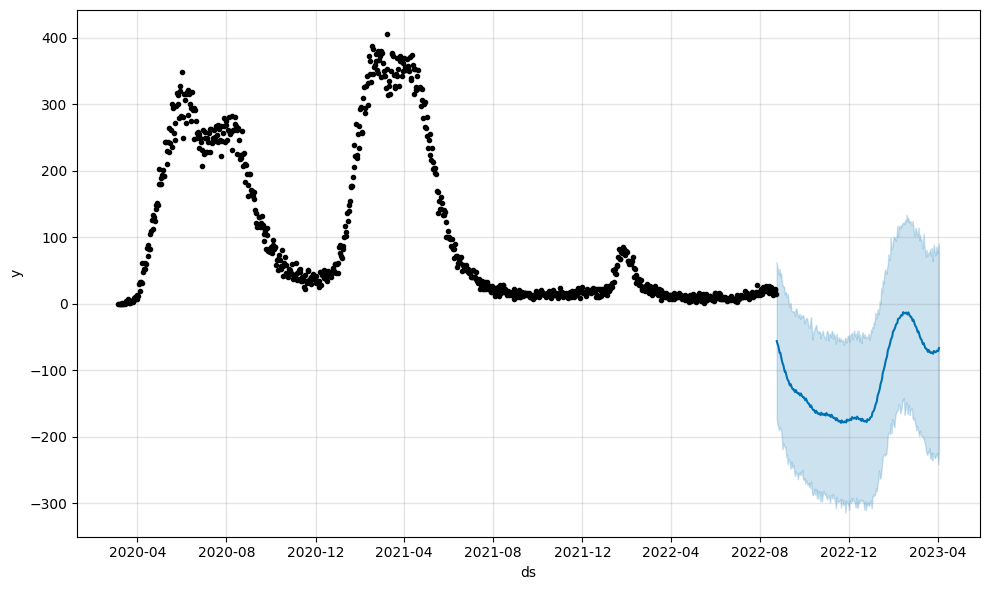

In [ ]:
# Visualizing the results
fig = model.plot(forecast)